L=30
T=1.80
L=40
T=1.80
L=50
T=1.80
L=60
T=1.80
L=70
T=1.80
L=80
T=1.80
L=90
T=1.80
L=100
T=1.80


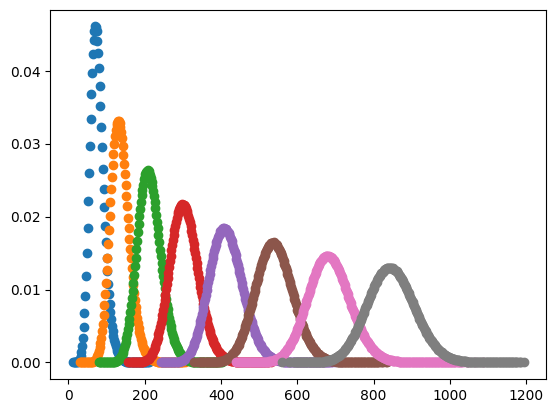

In [8]:
import sys,os
sys.path.append('../../')
from paths import *
from dadapy.id_discrete import IdDiscrete
import numpy as np
from time import time 
import matplotlib.pyplot as plt


start = time()

eps = 1E-7
L_list = np.arange(30,100+1,10,dtype=int)
M_flag = 1
N_list = L_list**2
geometry = 'Ising-square'
datafolder = f'/scratch/sacevedo/{geometry}/canonical/'

T_list = [1.8]
n_sigma = 2

fix,ax = plt.subplots(1)

ds = np.zeros(shape=(len(L_list),))
for L_id,L in enumerate(L_list):
  print(f'{L=}')
  for T_id,T in enumerate(T_list):
    print(f'{T=:.2f}')
    if T != np.inf:
      datafile = datafolder + f'L{L}/T{T:.2f}.txt'
      X = np.loadtxt(f'{datafile}').astype(float)
    else:
      pass
    if M_flag:
      M0 = np.sum(X,axis=1)
      indices = np.where(M0<0)
      X[indices] = - X[indices]

    I3D = IdDiscrete(X, condensed=False, maxk=X.shape[0] - 1)
    I3D.compute_distances(metric="manhattan") 
    values,counts = np.unique(I3D.distances[:,1:],return_counts=True)
    probs = counts / sum(counts)
    mu_D = np.dot(values,probs)
    sigma_D = np.sqrt(np.dot(values**2,probs)-(mu_D)**2)
    lk = int(mu_D-n_sigma*sigma_D)
    ln = int(mu_D-(n_sigma+.1)*sigma_D)
    ln = lk - 10
    d,err,_= I3D.compute_id_binomial_lk(lk=lk,ln=lk-5,method='mle')
    ds[L_id] = d
    ax.plot(values,probs,'o')
plt.show() 

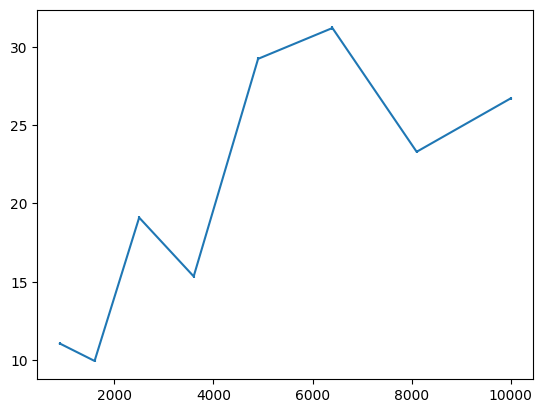

In [18]:
fig, ax = plt.subplots(1)

ax.errorbar(N_list,ds,[err for d in ds])
resultsfolder = makefolder(base=f'results/',
                          create_folder=True,
                          T=float(T),
                          )
np.savetxt(fname=f'{resultsfolder}ds.txt' ,X=np.vstack((L_list,ds)).T)
plt.show()

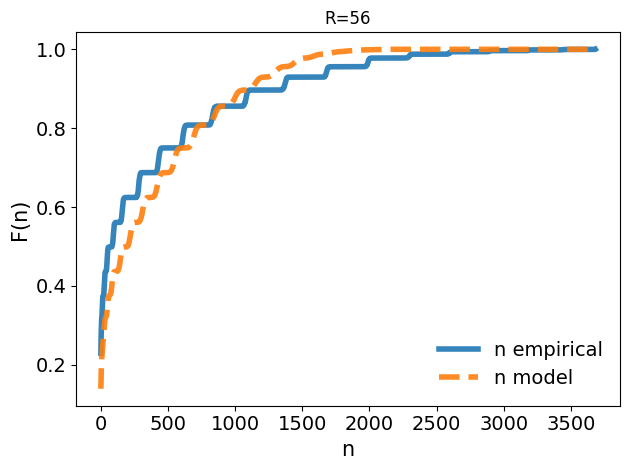

(0.13444999999999996, 1.5576679380867723e-75)

In [6]:
I3D.model_validation_full()

# Scale dependence

L=30
T=1.80


/home/sacevedo/my_env/lib64/python3.8/site-packages/dadapy/id_discrete.py:83: UserWarning: data type is int64: most methods work only with float-type inputs
  super().__init__(


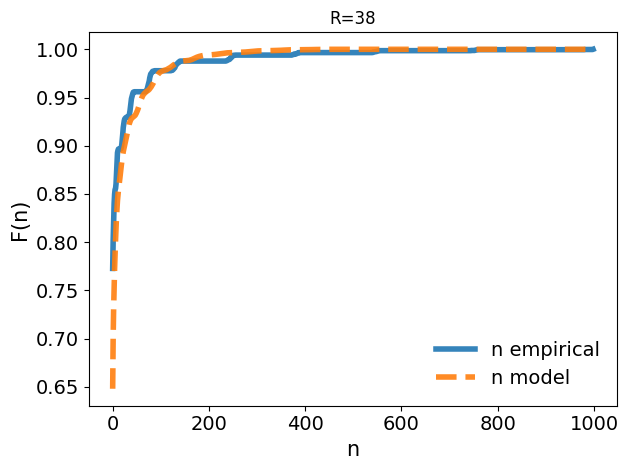

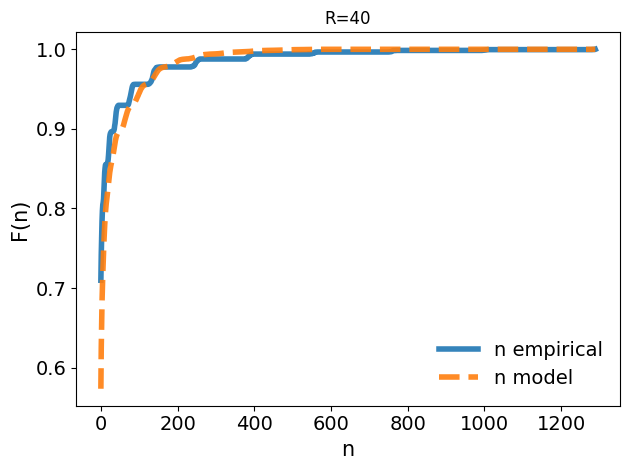

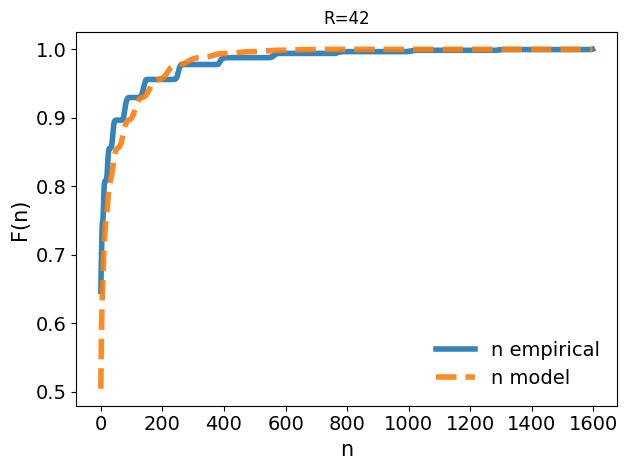

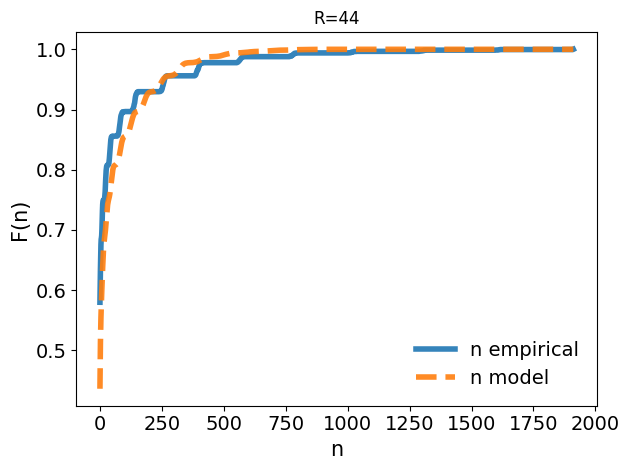

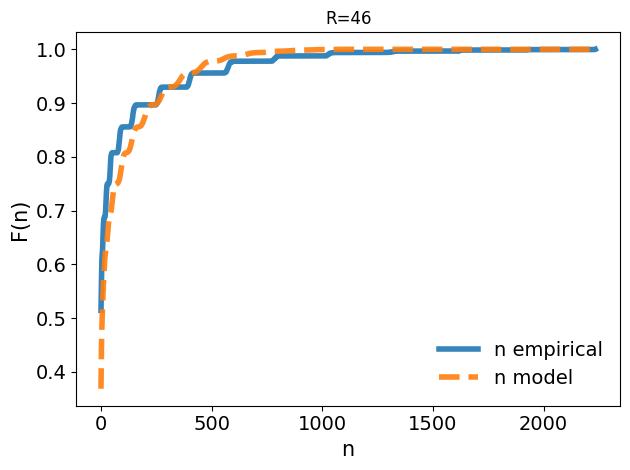

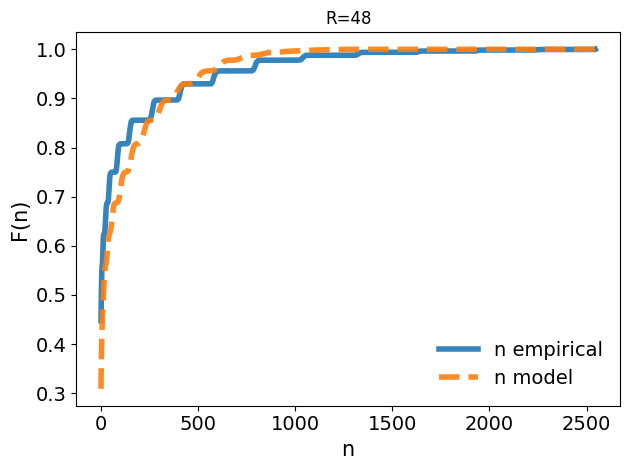

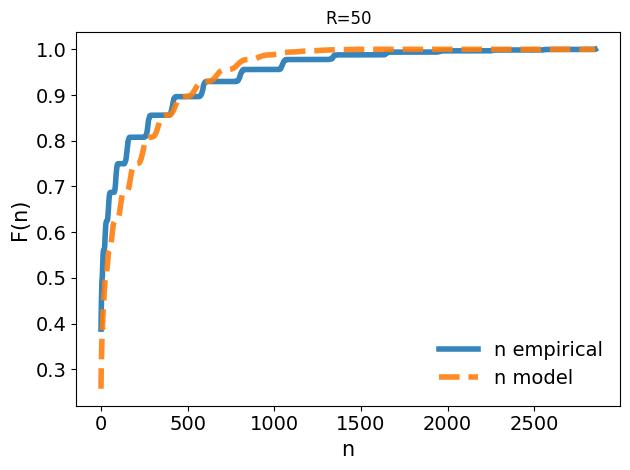

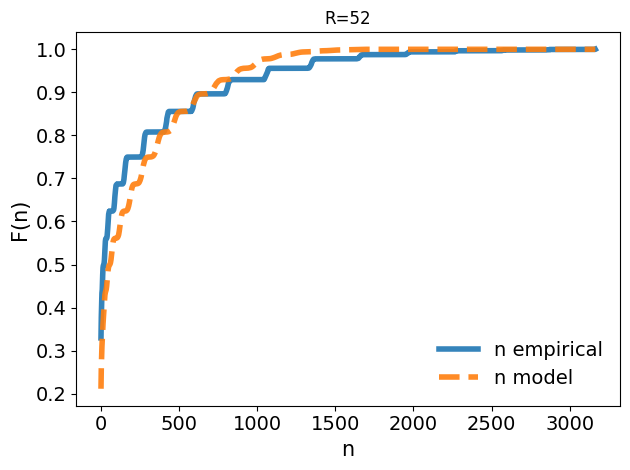

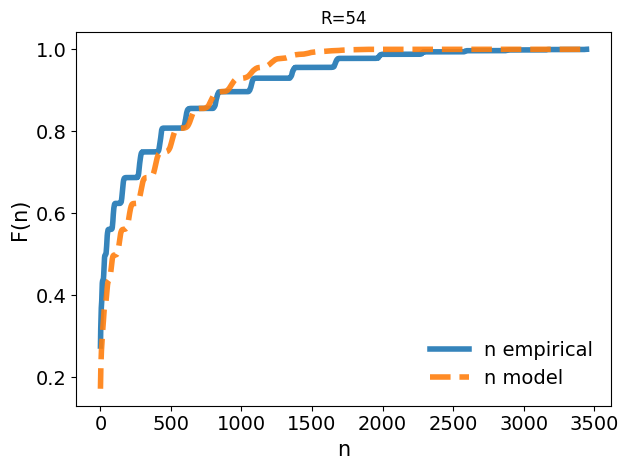

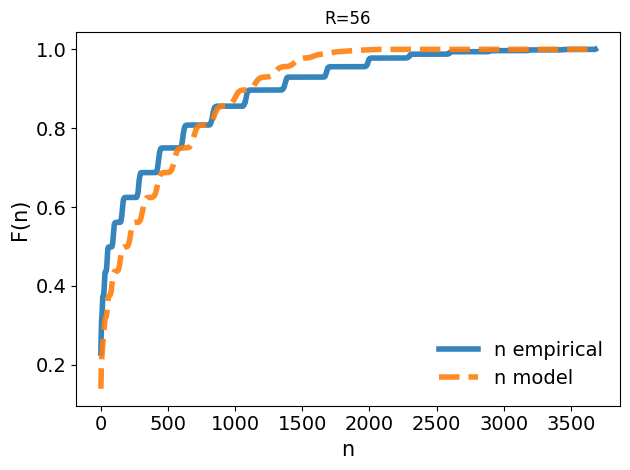

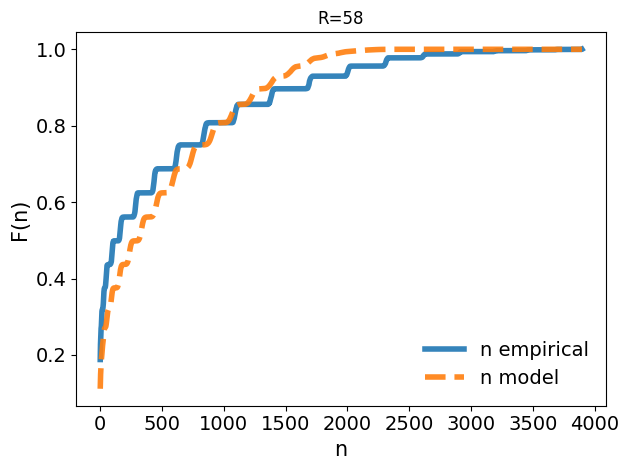

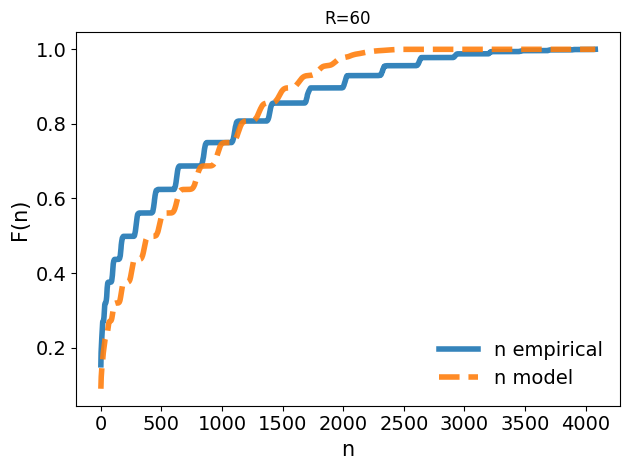

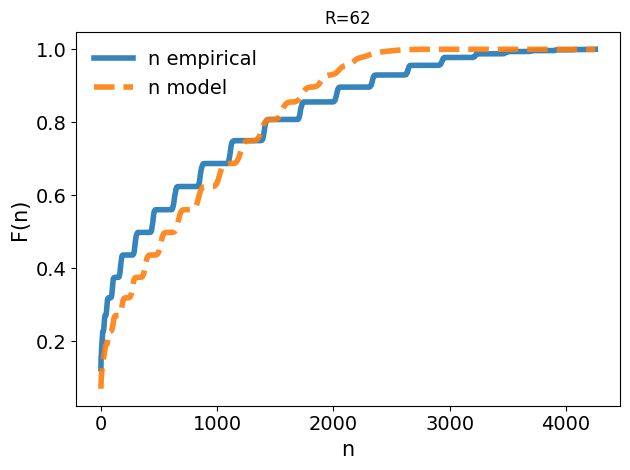

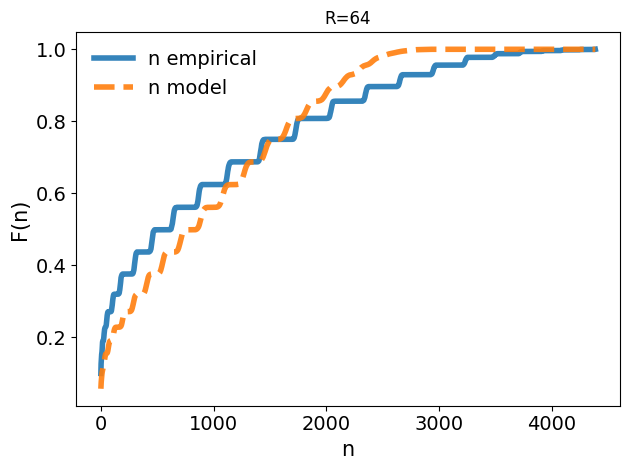

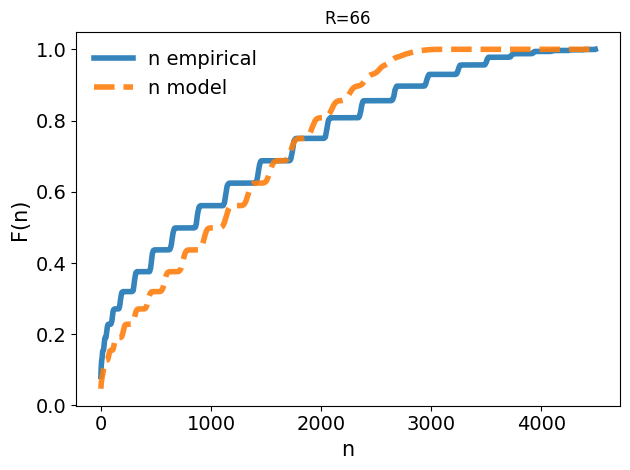

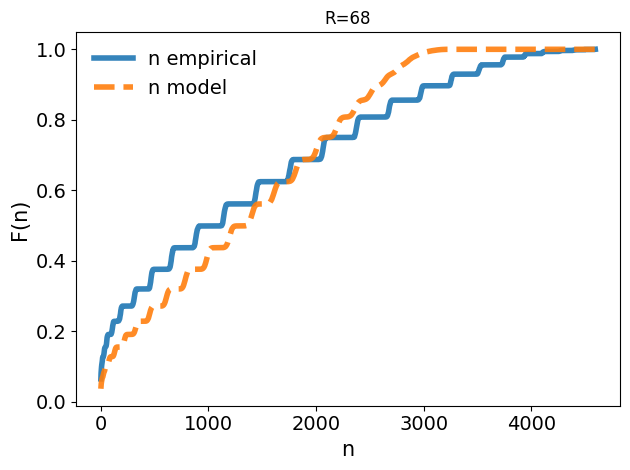

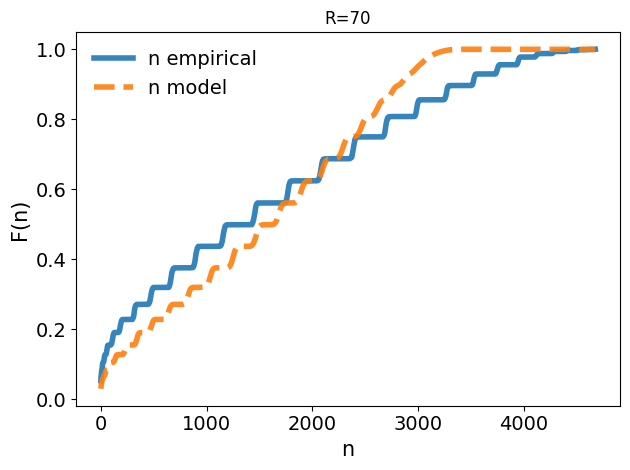

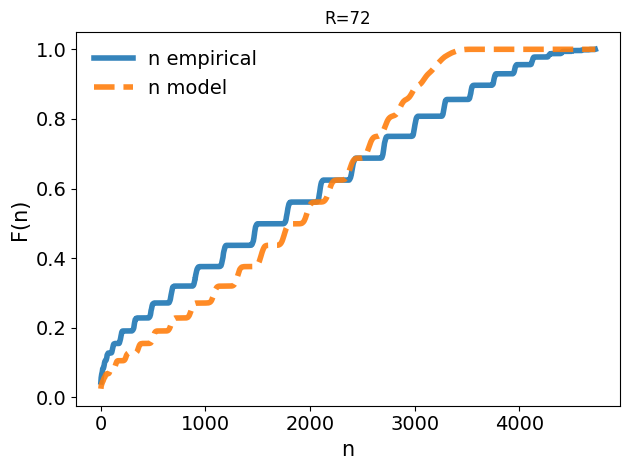

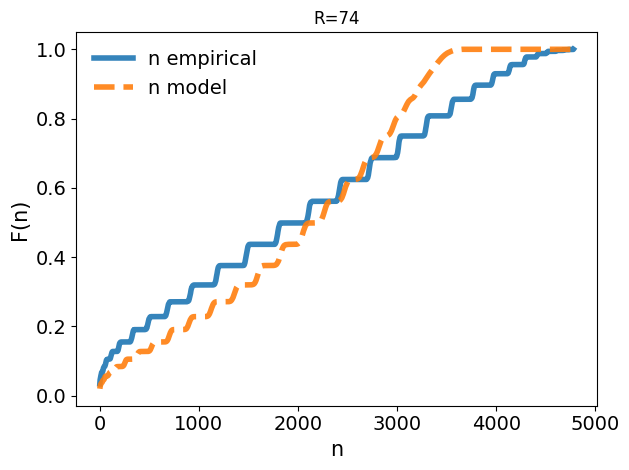

In [7]:
import sys,os
sys.path.append('../../')
from paths import *
from dadapy.id_discrete import IdDiscrete
import numpy as np
from time import time 
import matplotlib.pyplot as plt


start = time()

eps = 1E-7
L_list = np.arange(30,30+1,10,dtype=int)
M_flag = 1
N_list = L_list**2
geometry = 'Ising-square'
datafolder = f'/scratch/sacevedo/{geometry}/canonical/'

T_list = [1.8]
n_sigma = 2

for L_id,L in enumerate(L_list):
  print(f'{L=}')

  for T_id,T in enumerate(T_list):
    print(f'{T=:.2f}')
    if T != np.inf:
      datafile = datafolder + f'L{L}/T{T:.2f}.txt'
      X = np.loadtxt(f'{datafile}').astype(int)
    else:
      pass
    resultsfolder = makefolder(base=f'results/',
                              create_folder=True,
                              L=L,
                              T=float(T),
                              )
    if M_flag:
      M0 = np.sum(X,axis=1)
      indices = np.where(M0<0)
      X[indices] = - X[indices]

    I3D = IdDiscrete(X, condensed=False, maxk=X.shape[0] - 1)
    I3D.compute_distances(metric="manhattan") 
    values,counts = np.unique(I3D.distances[:,1:],return_counts=True)
    probs = counts / sum(counts)
    mu_D = np.dot(values,probs)
    sigma_D = np.sqrt(np.dot(values**2,probs)-(mu_D)**2)
    lk0 = int(mu_D-n_sigma*sigma_D)
    ln = lk - 10
    ds = []
    ks_list = []
    lks = np.arange(lk0,int(mu_D),2,dtype=int)
    for lk in lks:
      d,err,_= I3D.compute_id_binomial_lk(lk=lk,ln=lk-5,method='mle')
      ds.append(d)
      ks_stat, p_value = I3D.model_validation_full();
      ks_list.append(ks_stat)

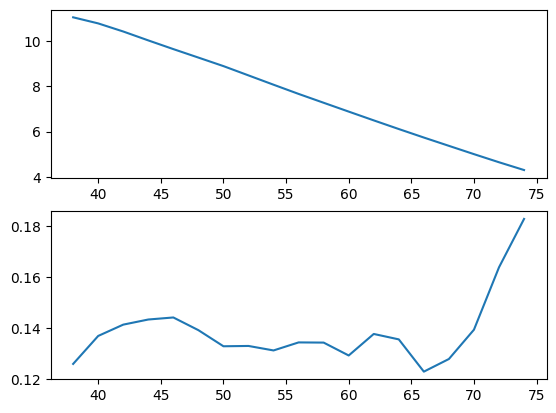

In [21]:
fig,ax = plt.subplots(2,1)

ax[0].plot(lks,ds)
ax[1].plot(lks,ks_list)